In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset (modify the file path accordingly)
df = pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name="data")


In [4]:
# Data Preprocessing
df.dropna(inplace=True)  # Handle missing values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

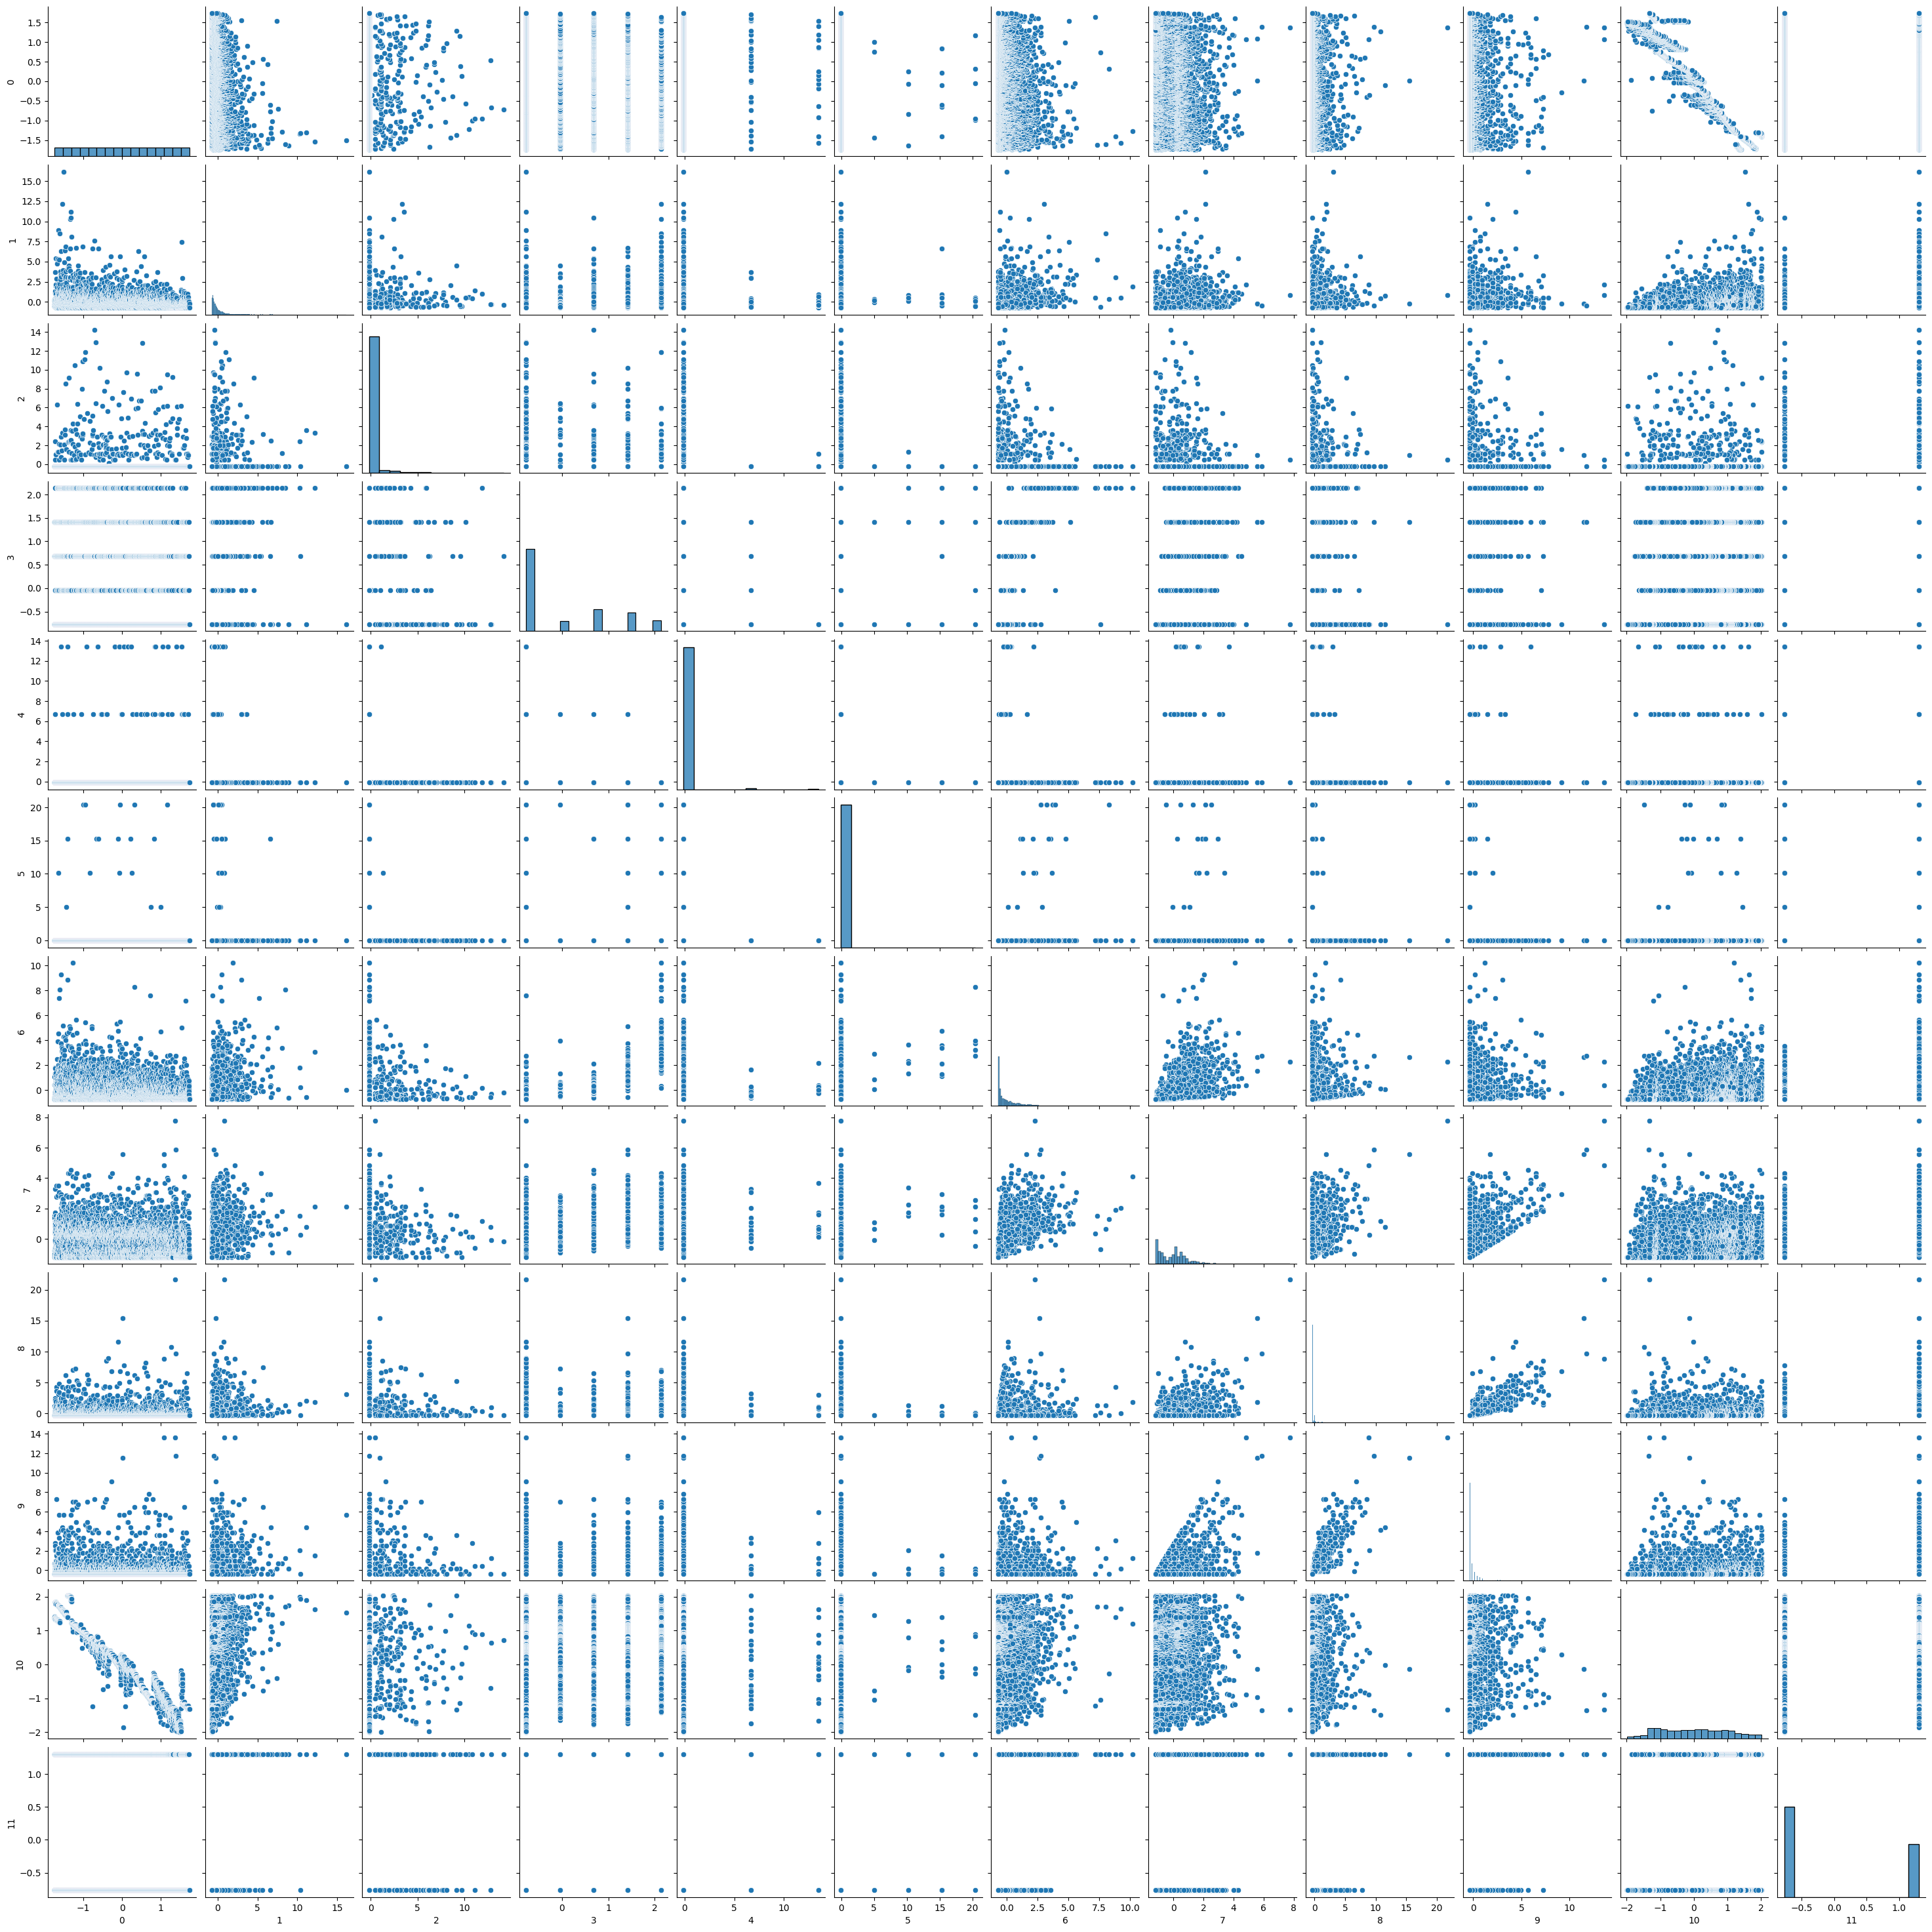

In [5]:
# Exploratory Data Analysis (EDA)
sns.pairplot(pd.DataFrame(df_scaled))
plt.show()

In [6]:
# K-Means Clustering
sse = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)


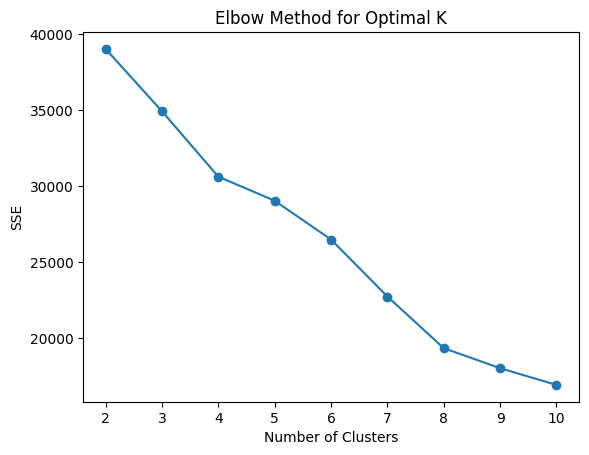

In [7]:
# Elbow Method Plot
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

In [8]:
# Applying K-Means with optimal K
optimal_k = 3  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


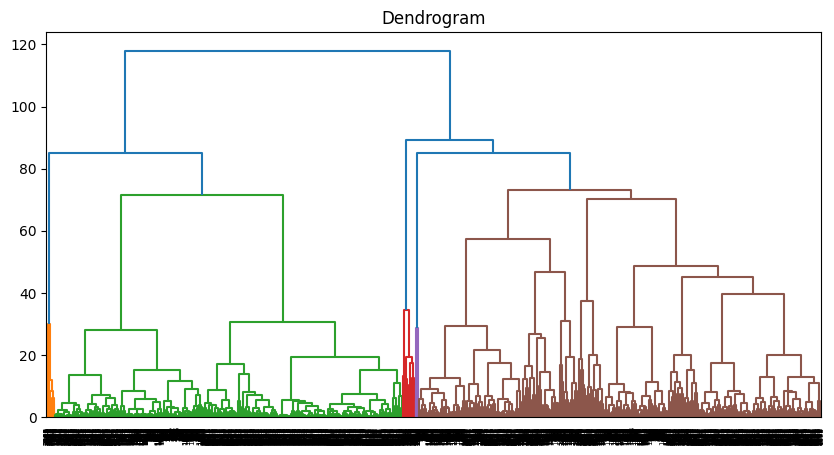

In [9]:
# Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

In [10]:
# Applying Hierarchical Clustering with chosen cluster count
hc_labels = fcluster(linked, t=optimal_k, criterion='maxclust')


In [11]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

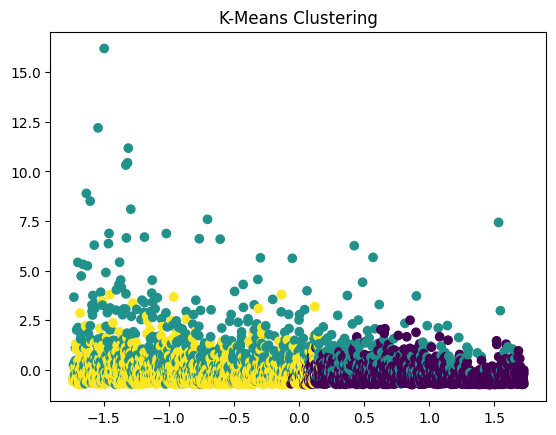

In [12]:
# Cluster Visualization
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis', label='K-Means')
plt.title("K-Means Clustering")
plt.show()

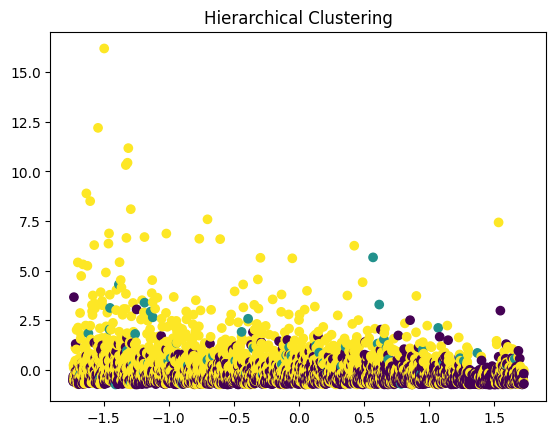

In [13]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=hc_labels, cmap='viridis', label='Hierarchical')
plt.title("Hierarchical Clustering")
plt.show()

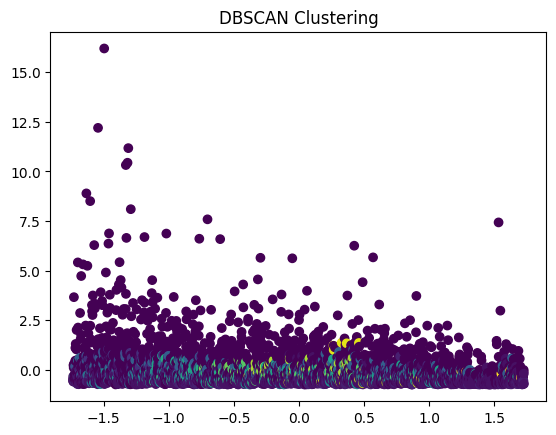

In [14]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis', label='DBSCAN')
plt.title("DBSCAN Clustering")
plt.show()

In [15]:
# Evaluation using Silhouette Score
print("Silhouette Score (K-Means):", silhouette_score(df_scaled, kmeans_labels))
print("Silhouette Score (DBSCAN):", silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A")

Silhouette Score (K-Means): 0.201891717665419
Silhouette Score (DBSCAN): -0.2823258834687895
